In [1]:
import tensorflow as tf #tensorflow is for building and training deep learning models
from tensorflow import keras #for simplifying building and training 
from tensorflow.keras import datasets,models,layers
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
#specifies that Matplotlib plots should be displayed directly in the notebook output cell rather than in a separate window

In [2]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

In [3]:
len(x_train)  #no. of images in training dataset

60000

In [4]:
len(x_test) #no. of images in testing dataset

10000

In [5]:
x_train[0].shape #every image is of 28x28 pixel

(28, 28)

In [6]:
len(x_train[0].shape) #shape depicts that image is greyscale

2

In [7]:
#scaling the dataset for better accuracy
x_train=x_train/255
x_test=x_test/255

In [8]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [9]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [10]:
#the above cell shows that each image represents a 2D array with values between 0 and 255

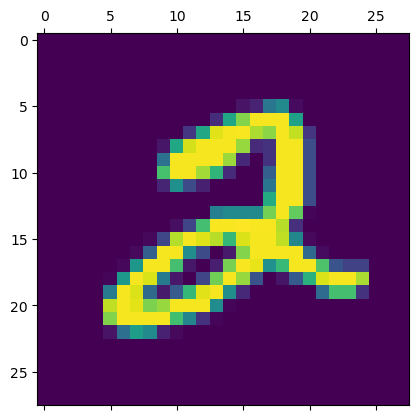

In [11]:
plt.matshow(x_train[5])

In [12]:
y_train[5]

2

## First creating an ANN model

In [13]:
ann_model=models.Sequential([
    layers.Flatten(input_shape=(28,28)), #we have specify the input shape for first layer
    layers.Dense(100,activation='relu'), #relu helps in non linearity. it gives zero for negative values and the number itself for positive numbers
    layers.Dense(10,activation='sigmoid')
])
ann_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
) # When compiling your model, you specify sparse_categorical_crossentropy as the loss function if your target labels are integers. Additionally, you usually specify 'accuracy' as a metric to monitor during training.
history=ann_model.fit(x_train,y_train,epochs=5)
final_accuracy = history.history['accuracy'][-1]
print("Accuracy:", final_accuracy * 100, "%")

C:\Users\vishw\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8757 - loss: 0.4463
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9605 - loss: 0.1361
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9740 - loss: 0.0883
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9808 - loss: 0.0635
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9838 - loss: 0.0518
Accuracy: 98.37499856948853 %


In [14]:
loss,accuracy=ann_model.evaluate(x_test,y_test)
print("accuracy:",accuracy*100)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9682 - loss: 0.1024
accuracy: 97.35000133514404


In [15]:
x_train_flat=x_train.reshape(len(x_train),28*28)
x_test_flat=x_test.reshape(len(x_test),28*28)
x_train_flat.shape

(60000, 784)

In [16]:
y_predict=ann_model.predict(x_test)
print(y_predict[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[3.2277264e-02 2.5202597e-02 4.6741503e-01 9.9264741e-01 8.8632278e-06
 4.0385593e-02 7.8535663e-07 9.9999404e-01 2.1225352e-02 4.0965170e-01]


In [17]:
from sklearn.metrics import confusion_matrix , classification_report
y_predict=ann_model.predict(x_test)
y_predict_class=[np.argmax(element) for element in y_predict] # gives the element that has the the highest activation in each prediction
print("classification report: \n",classification_report(y_test,y_predict_class))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
classification report: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.98      0.99      0.98      1135
           2       0.98      0.97      0.98      1032
           3       0.93      0.99      0.96      1010
           4       0.98      0.97      0.98       982
           5       0.98      0.97      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.98      0.97      1028
           8       0.98      0.95      0.96       974
           9       0.98      0.94      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



## Now let's make a CNN model

In [18]:
cnn_model=models.Sequential([
    #feature extrction(cnn):
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)),#we have specify the input shape for first layer
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    #classification(dense):
    layers.Flatten(), #we have specify the input shape for first layer
    layers.Dense(100,activation='relu'), #relu helps in non linearity. it gives zero for negative values and the number itself for positive numbers
    layers.Dense(10,activation='softmax') #here we have use softmax its help us to normalise
])

C:\Users\vishw\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
cnn_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

In [20]:
history1=cnn_model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 60s 29ms/step - accuracy: 0.8773 - loss: 0.3986
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 57s 31ms/step - accuracy: 0.9786 - loss: 0.0701
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 61s 32ms/step - accuracy: 0.9856 - loss: 0.0464
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 59s 31ms/step - accuracy: 0.9880 - loss: 0.0342
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 77s 29ms/step - accuracy: 0.9912 - loss: 0.0260


#### accuracy on train dataset

In [21]:
final_accuracy = history1.history['accuracy'][-1]
print("Accuracy:", final_accuracy * 100, "%")

Accuracy: 99.08000230789185 %


#### accuracy on test dataset

In [22]:
loss,accuracy=cnn_model.evaluate(x_test,y_test)
print("accuracy:",accuracy*100)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9826 - loss: 0.0635
accuracy: 98.65000247955322


In [23]:
from sklearn.metrics import confusion_matrix , classification_report
y_predict=cnn_model.predict(x_test)
y_predict_class=[np.argmax(element) for element in y_predict] # gives the element that has the the highest activation in each prediction
print("classification report: \n",classification_report(y_test,y_predict_class))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
classification report: 
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       980
           1       1.00      0.99      1.00      1135
           2       1.00      0.98      0.99      1032
           3       0.99      0.99      0.99      1010
           4       1.00      0.97      0.99       982
           5       0.96      0.99      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

